In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from matplotlib.ticker import *

# Function draw cumulative-bar
def draw_WaterFall_bar(x_label, DF, DF_Table, y_digit, Colors, Title, ylabel, ax):
    """
    Arguments：
    x_label : Factor category
    DF: Data frame
    Title : figure title
    ax : Area for graphing
    """
    ## set initials
    width = 1.0
    linewidth = 2.5
    bottom_data = 0
    x = np.arange(len(x_label))
    
    ## get y limit
    ##get y_top_unit
    ymax = max(DF)
    #for i in range(len(x)-1) :
    #    if DF.iloc[i] > 0:
    #        ymax += DF.iloc[i]
    y_top = round(ymax * 1.0, -(len(str(ymax).split('.')[0]) - 1))

    if y_digit < 2:
        if y_top < ymax:
            y_top += 0.5
        y_top = round(y_top,1)
        # Figure out the unit of y_top
        y_unit = 1000**math.floor((y_digit) / 3)
        ## set y_top_unit
        y_top_unit = y_top / y_unit
        if y_top_unit - (ymax / y_unit) > 0.5:
            y_top_unit -= 0.2
    
    elif y_digit < 10:
        if y_top < ymax:
            y_top += 10**(y_digit - 1)
        y_top = int(y_top)
        # Figure out the unit of y_top
        y_unit = 1000**math.floor((y_digit - 1) / 3)
        ## set y_top_unit
        y_top_unit = y_top / y_unit
        if y_top_unit - (ymax / y_unit) > 50:
            y_top_unit -= 50

    else:
        if y_top < ymax:
            y_top += 10**(y_digit - 2)
        y_top = int(y_top)
        # Figure out the unit of y_top
        y_unit = 1000**math.floor((y_digit - 2) / 3)
        ## set y_top_unit
        y_top_unit = y_top / y_unit
        if y_top_unit - (ymax / y_unit) > 50:
            y_top_unit -= 50

    #get y_bottom_unit
    ymin = min(DF)
    #for i in range(len(x)-1) :
    #    if DF.iloc[i] < 0:
    #        ymin += DF.iloc[i]
    y_bottom = -round(abs(ymin) * 1.0, -(len(str(abs(ymin)).split('.')[0]) - 1))
    
    if y_digit < 2:
        if y_bottom > ymin:
            y_bottom -= 0.5
        y_bottom = round(y_bottom,1)
        # Figure out the unit of y_top
        y_unit = 1000**math.floor((y_digit) / 3)
        ## set y_bottom_unit
        y_bottom_unit = y_bottom / y_unit
        if y_bottom_unit - (ymin / y_unit) < -0.5:
            y_bottom_unit += 0.2
    
    elif y_digit < 10:
        if y_bottom > ymin:
            y_bottom -= 10**(y_digit - 1)
        y_bottom = int(y_bottom)
        # Figure out the unit of y_top
        y_unit = 1000**math.floor((y_digit - 1) / 3)
        ## set y_bottom_unit
        y_bottom_unit = y_bottom / y_unit
        if y_bottom_unit - (ymin / y_unit) < -50:
            y_bottom_unit += 50
    
    else:
        if y_bottom > ymin:
            y_bottom -= 10**(y_digit - 2)
        y_bottom = int(y_bottom)
        # Figure out the unit of y_top
        y_unit = 1000**math.floor((y_digit - 2) / 3)
        ## set y_bottom_unit
        y_bottom_unit = y_bottom / y_unit
        if y_bottom_unit - (ymin / y_unit) < -50:
            y_bottom_unit += 50
        
    ## set y_limit
    ax.set_ylim(y_bottom_unit, y_top_unit) 
                
    ## set x_limit
    ax.set_xlim(-0.5, len(x)-0.5)
        
    ## Draw water fall bar
    # set Colors
    EdgeColors = Colors
    # set edgecolor
    edgecolor_list = []
    for i in range(len(x)):
        edgecolor_list.append('none')
    
    # draw water fall bar
    #h_adj = y_top_unit / 200
    #v_adj = 0.1
    for i in range(len(x)):
        if i == 0: 
            edgecolor = edgecolor_list.copy()
            edgecolor[i] = EdgeColors[i]
                
            ax.bar(x, DF_Table.iloc[:,i] / y_unit,
                    width, bottom=bottom_data, color=Colors[i], 
                    edgecolor=edgecolor, linewidth=linewidth)
            # write value of bar graph
    
        elif DF_Table.index[i] == 'Total' :
            bottom_data = 0
            edgecolor = edgecolor_list.copy()
            edgecolor[i] = 'none'
                
            ax.bar(x,DF_Table.iloc[:,i] / y_unit, 
                    width, bottom=bottom_data, color=Colors[i], 
                    edgecolor=edgecolor, linewidth=linewidth)
            
        else:  
            bottom_data =0 #+= DF_Table.iloc[i-1,(i-1)] / y_unit
            edgecolor = edgecolor_list.copy()
            edgecolor[i] = EdgeColors[i]
                    
            ax.bar(x,DF_Table.iloc[:,i] / y_unit, 
                    width, bottom=bottom_data, color=Colors[i], 
                    edgecolor=edgecolor, linewidth=linewidth)
            # write value of bar graph
    
    ## write x=0 line
    ax.axhline(linewidth=linewidth,color='black')
    
    ## set figure elements
    ax.tick_params(labelsize=labelsize)
    ax.set_ylabel(ylabel, size=labelsize)
    ax.set_xticklabels(x_label, fontsize=labelsize, ha='center', rotation=0)
    ax.set_xticks(x)
    
    if DF.Total > 0:
        if y_top_unit <= 0.5:
            ax.yaxis.set_major_locator(MultipleLocator(0.1))
        elif y_top_unit <= 1.5:
            ax.yaxis.set_major_locator(MultipleLocator(0.5))
        elif y_top_unit <= 10:
            ax.yaxis.set_major_locator(MultipleLocator(2))
        elif y_top_unit <= 20:
            ax.yaxis.set_major_locator(MultipleLocator(5))
    else :
        if y_bottom_unit >= 0.5:
            ax.yaxis.set_major_locator(MultipleLocator(0.1))
        elif y_bottom_unit >= -1.5:
            ax.yaxis.set_major_locator(MultipleLocator(0.5))
        elif y_bottom_unit >= -10:
            ax.yaxis.set_major_locator(MultipleLocator(2))
        elif y_bottom_unit >= -20:
            ax.yaxis.set_major_locator(MultipleLocator(5))
            
    ##set tittle
    ax.set_title(Title, size=fontsize + 2, loc='left')


def set_DataFrame(DF,i) :
    # Sort in descending order 
    DF_i = DF.iloc[i,:]
    DF_i = DF_i.drop('SectorName')
    
    DF_i_Index = DF_i.index
    n_Index = len(DF_i_Index)

    DF_Table = pd.DataFrame(index=DF_i_Index, columns=range(n_Index))
    DF_Table.fillna(0, inplace=True)
    for i in range(n_Index):
        DF_Table.iloc[i,i] = DF_i.iloc[i]
    
    return DF_i, DF_Table 


def set_Colors(x_label,DF,Judge):
    Color_Improve = '#446fcc'
    Color_Worse = '#d3354c'
    Color_None = 'lightgrey'
    Color_total = 'dimgrey'
    
    Colors_OUT =[]
    if Judge > 0:
        for i in range(len(x_label)):
            if DF.index[i] == 'Total':
                Colors_OUT.append(Color_total)
            else:
                if DF.iloc[i] > 0 :
                    Colors_OUT.append(Color_Improve)
                elif DF.iloc[i] < 0 :
                    Colors_OUT.append(Color_Worse)
                else :
                    Colors_OUT.append(Color_None)
    else:
        for i in range(len(x_label)):
            if DF.index[i] == 'Total':
                Colors_OUT.append(Color_total)
            else:
                if DF.iloc[i] < 0 :
                    Colors_OUT.append(Color_Improve)
                elif DF.iloc[i] > 0 :
                    Colors_OUT.append(Color_Worse)
                else:
                    Colors_OUT.append(Color_None)
    return Colors_OUT

def set_ydigit(DF_Best,DF_Worst) :
    ymax = max(DF_Best.Total)
    y_top = round(ymax * 1.0, -(len(str(ymax).split('.')[0]) - 1))
    # Figure out the number of digits in y_top
    y_digit_top = len(str(ymax).split('.')[0])
    
    #get y_digit_bottom
    ymin = min(DF_Worst.Total)
    y_bottom = -round(abs(ymin) * 1.0, -(len(str(abs(ymin)).split('.')[0]) - 1))
    # Figure out the number of digits in y_bottom
    y_digit_bottom = len(str(abs(ymin)).split('.')[0])
    
    #set y_digit
    y_digit = min(y_digit_top,y_digit_bottom)
    
    return y_digit

In [2]:
# load Data
ExcelFile_R2 = '/Users/hata_s/Dropbox/01_Research/02_MF_TimeSeries/03_Matlab/02_Result/R2_Data.xlsx'
#RP: Resource productivity
df_RP = pd.read_excel(ExcelFile_R2, sheet_name='RP',skiprows=1).set_index('No')
df_RP = df_RP.reindex(index=df_RP.index, columns=['SectorName','D1','D2','D3','y','v','R','O','Total'])
df_RP = df_RP.drop('O',axis=1)

#CUin: Cyclical use (inflow)
df_CUin = pd.read_excel(ExcelFile_R2, sheet_name='CUin',skiprows=1).set_index('No')
df_CUin = df_CUin.reindex(index=df_CUin.index, 
                          columns=['SectorName','D1','D2','D3','y','R','U','O','Total'])
df_CUin = df_CUin.drop('O',axis=1)

#CUout: Cyclical use (outflow)
df_CUout = pd.read_excel(ExcelFile_R2, sheet_name='CUout',skiprows=1).set_index('No')
df_CUout = df_CUout.reindex(index=df_CUout.index, 
                          columns=['SectorName','D1','D2','D3','y','R','U','w','w$_O$','W$_{other}$','Total'])
df_CUout = df_CUout.drop('W$_{other}$',axis=1)

#FD: Final disposal
df_FD = pd.read_excel(ExcelFile_R2, sheet_name='FD',skiprows=1).set_index('No')
df_FD = df_FD.reindex(index=df_FD.index, 
                      columns=['SectorName','D1','D2','D3','y','R','w','w$_O$','q','q$_O$','Q$_{other}$','Total'])
df_FD = df_FD.drop('Q$_{other}$',axis=1)

#CF: Carbon footprint
df_CF = pd.read_excel(ExcelFile_R2, sheet_name='CF',skiprows=1).set_index('No')


print(df_FD)
#print(df_FD_Table)

                           SectorName            D1             D2  \
No                                                                   
1   Agriculture, forestry and fishery  -3687.228692   39136.035848   
2                   Foods & Beverages  -5637.891698  -44977.091473   
3                    Textile products   1182.729656   -8590.523755   
4       Pulp, paper & wooden products   5765.233008  -25046.039123   
5                   Chemical products   4356.717355   -6004.001029   
6           Petroleum & coal products  -2005.752950   -3346.318765   
7           Plastic & rubber products   9866.973234   -7131.145349   
8      Ceramic, stone & clay products  -2640.629477  -14220.934044   
9                        Iron & steel  18115.252956 -127671.215512   
10                 Non-ferrous metals   3187.598416    4365.945362   
11                     Metal products   1798.039972  -36595.707936   
12               Mechanical machinery  -2625.309106  -20603.201114   
13               Ele

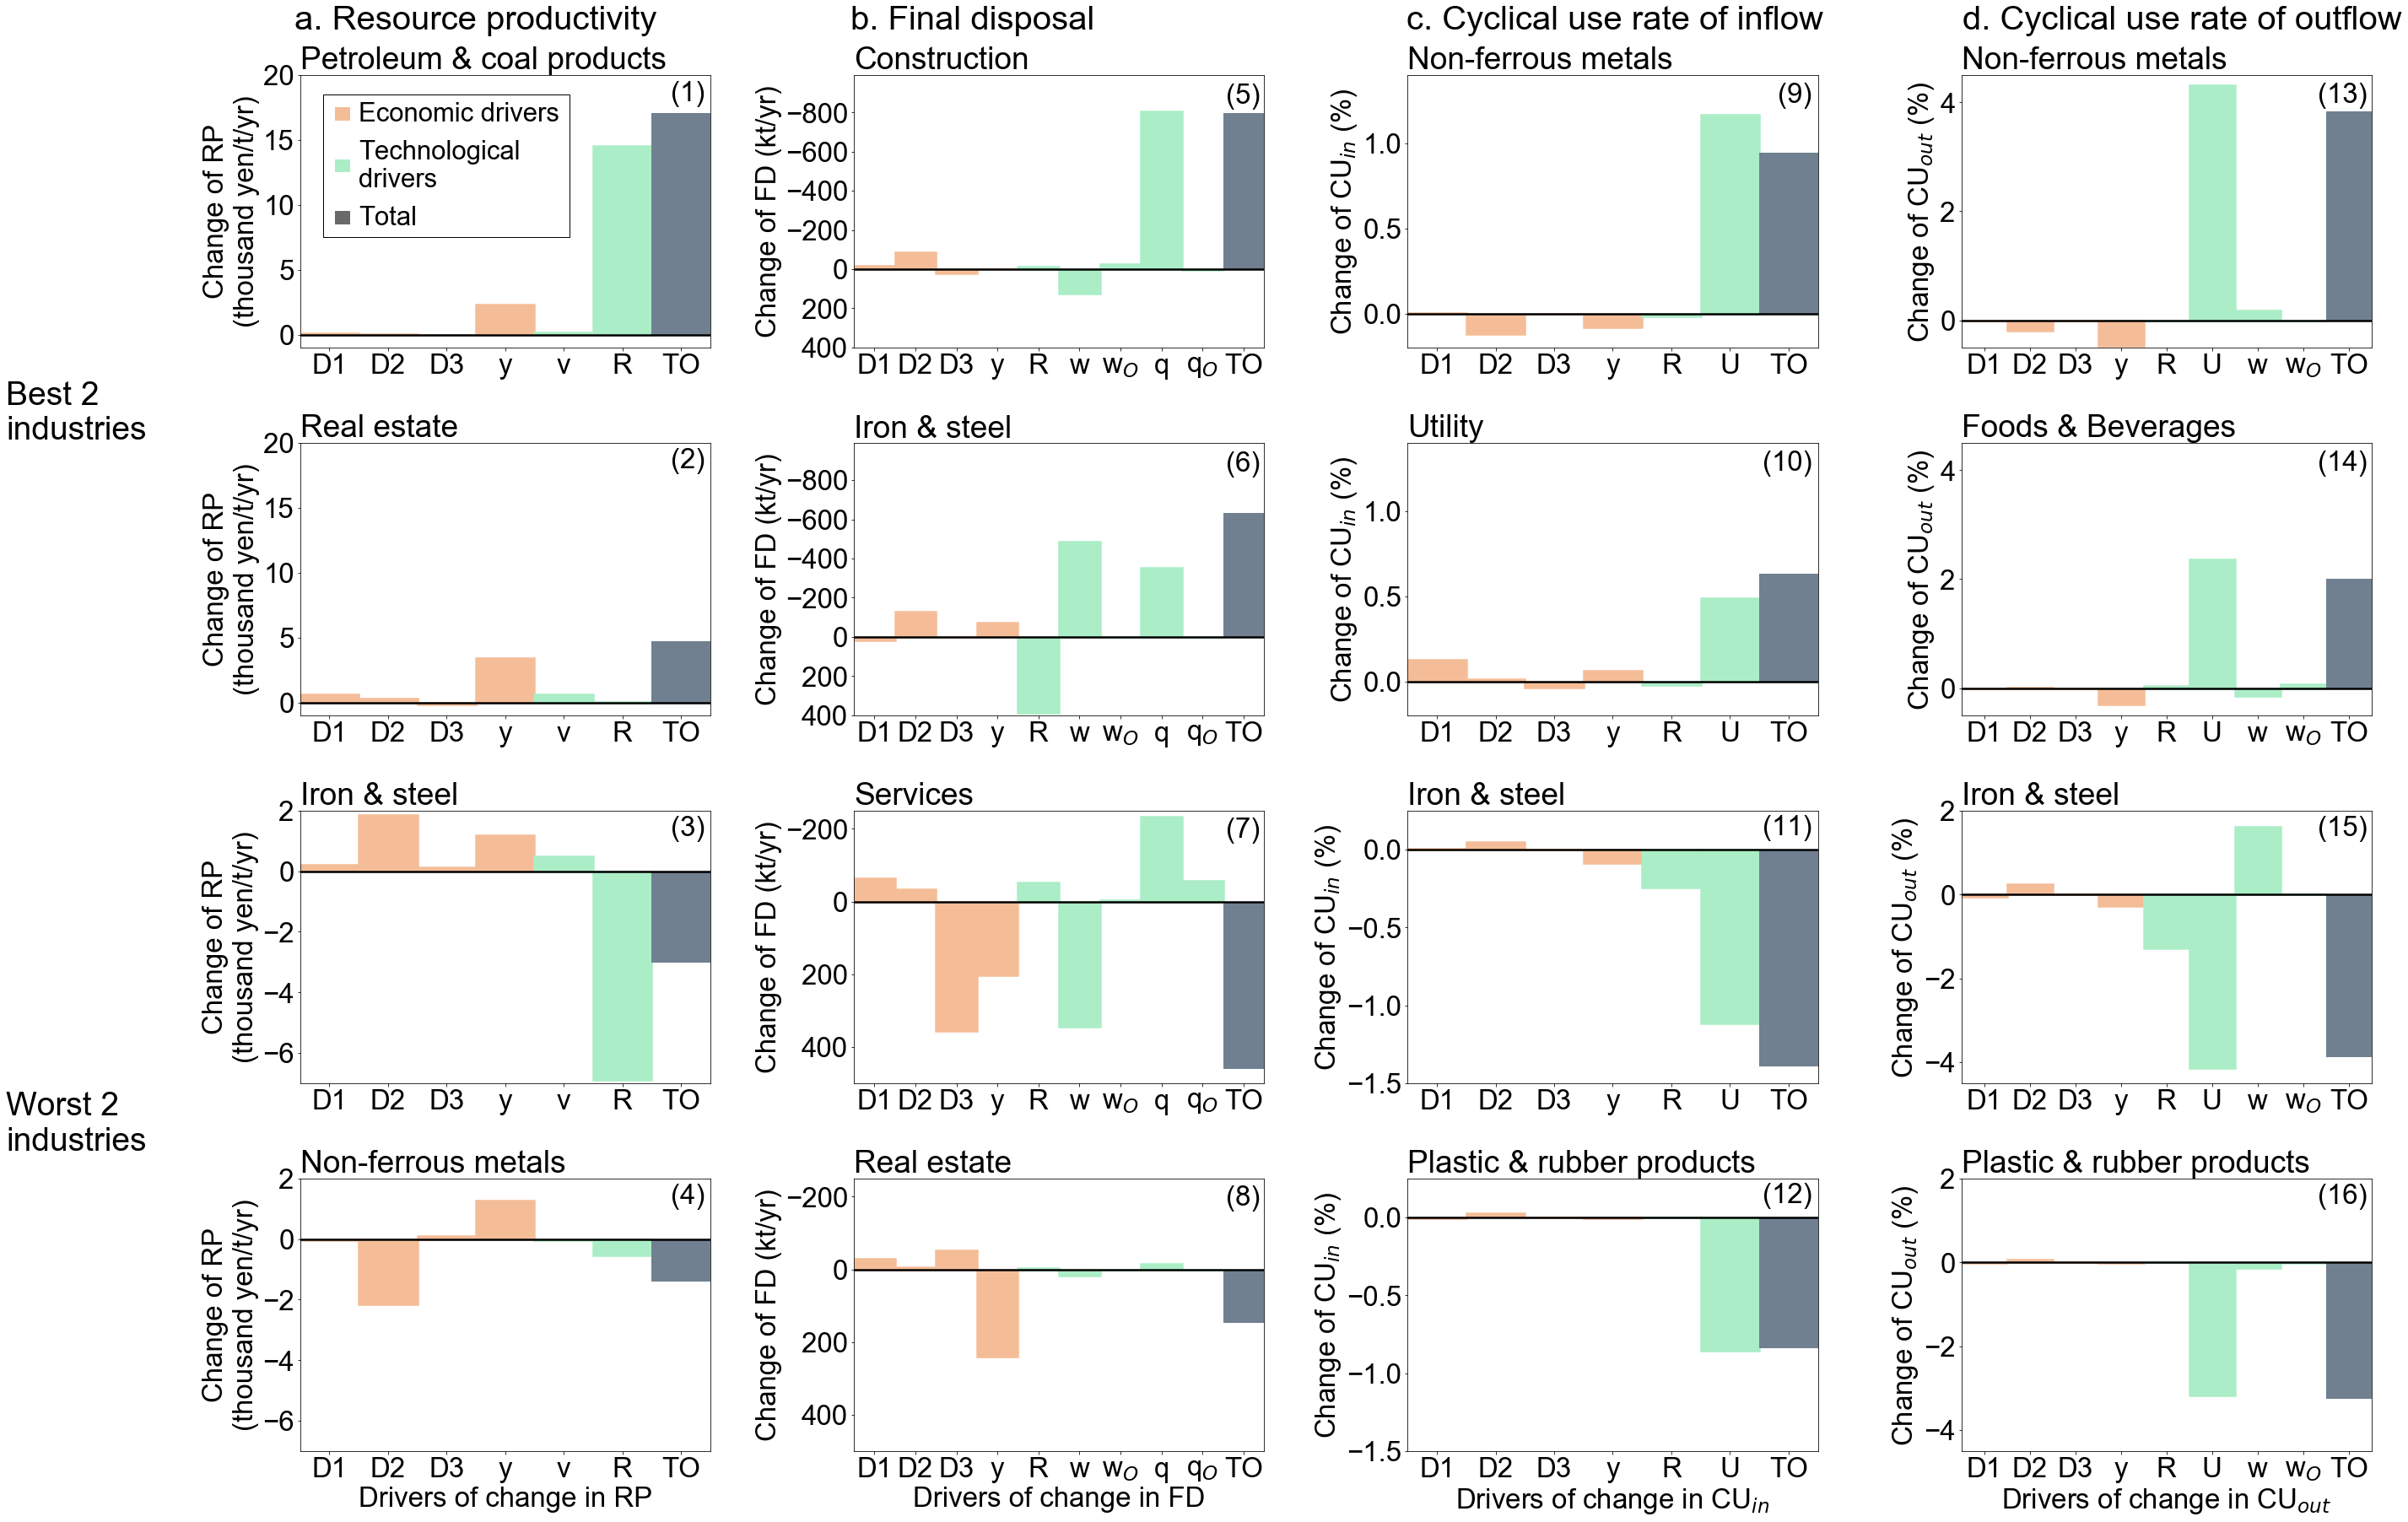

In [6]:
from matplotlib import patches
%matplotlib inline
# set plot area
fig_high = 30
fig_width = 44
n_Sector = 2
n_MFI = 4
fig, axes = plt.subplots(n_Sector*2, n_MFI,figsize=(fig_width,fig_high),
                               gridspec_kw=dict(width_ratios=[1, 1, 1, 1],height_ratios=[1, 1, 1, 1],
                                                wspace=0.35, hspace=0.35)) 

plt.rcParams['font.family'] = 'Arial'

# set Data frame
# RP
DF_RP_Best = df_RP.sort_values('Total',ascending=False).head(n_Sector)
DF_RP_Worst = df_RP.sort_values('Total',ascending=True).head(n_Sector)
tmp_index = df_RP.columns.drop('SectorName')
x_label_RP = tmp_index.tolist()
x_label_RP[x_label_RP.index('Total')] = 'TO'
# FD
DF_FD_Best = df_FD.sort_values('Total',ascending=True).head(n_Sector)
DF_FD_Worst = df_FD.sort_values('Total',ascending=False).head(n_Sector)
tmp_index = df_FD.columns.drop('SectorName')
x_label_FD = tmp_index.tolist()
x_label_FD[x_label_FD.index('Total')] = 'TO'
# CUin
DF_CUin_Best = df_CUin.sort_values('Total',ascending=False).head(n_Sector)
DF_CUin_Worst = df_CUin.sort_values('Total',ascending=True).head(n_Sector)
tmp_index = df_CUin.columns.drop('SectorName')
x_label_CUin = tmp_index.tolist()
x_label_CUin[x_label_CUin.index('Total')] = 'TO'
# CUout
DF_CUout_Best = df_CUout.sort_values('Total',ascending=False).head(n_Sector)
DF_CUout_Worst = df_CUout.sort_values('Total',ascending=True).head(n_Sector)
tmp_index = df_CUout.columns.drop('SectorName')
x_label_CUout = tmp_index.tolist()
x_label_CUout[x_label_CUout.index('Total')] = 'TO'
    
#set y_digit
y_digit_RP = set_ydigit(DF_RP_Best,DF_RP_Worst)
y_digit_FD = set_ydigit(DF_FD_Best,DF_FD_Worst)
y_digit_CUin = set_ydigit(DF_CUin_Best,DF_CUin_Worst)
y_digit_CUout = set_ydigit(DF_CUout_Best,DF_CUout_Worst)

# set initials
fontsize = 35
labelsize = 33

# set Color
C_Common = '#f4bd98'
C_Other = '#abedc6'
C_D1=C_Common
C_D2=C_Common
C_D3=C_Common
C_v=C_Other
C_U1=C_Other
C_U2=C_Other
C_w=C_Other
C_wo=C_Other
C_q=C_Other
C_qo=C_Other
C_y=C_Common
C_O=C_Other
C_Wother=C_Other
C_Qother=C_Other
C_Total='slategrey'

Colors_RP = [C_D1, C_D2, C_D3, C_y, C_v, C_U1,  C_Total]
Colors_CUin = [C_D1, C_D2, C_D3, C_y, C_U1, C_U2,  C_Total]
Colors_CUout = [C_D1, C_D2, C_D3, C_y, C_U1, C_U2, C_w,C_wo, C_Total]
Colors_FD = [C_D1, C_D2, C_D3, C_y, C_U1, C_w, C_q, C_wo, C_qo, C_Total]

#Draw Subplot
#RP
l = 0
ylim_max_best = 20
ylim_min_best = -1
ylim_max_worst = 2
ylim_min_worst = -7
for i in range(n_Sector):
    for j in range(2):
        k = i + 2*j
        if k < 2:
            DF_i, DF_Table = set_DataFrame(DF_RP_Best, i)
            #set Colors
            #Colors_RP = set_Colors(x_label_RP,DF_i,1)
            #draw bargraph
            Fig_RP_i = draw_WaterFall_bar(x_label_RP, DF_i, DF_Table, y_digit_RP, Colors_RP, 
                                                  DF_RP_Best.SectorName.iloc[i], 
                                                  'Change of RP\n(thousand yen/t/yr)',axes[k][l])
            #write fig No.
            tmp_no = k + 1 + l*4
            axes[k][l].text(len(x_label_RP)-0.6,ylim_max_best*0.98,'('+str(tmp_no)+')', 
                            fontsize=labelsize, ha='right', va='top')
            
        else:
            DF_i, DF_Table = set_DataFrame(DF_RP_Worst, i)
            #set Colors
            #Colors_RP = set_Colors(x_label_RP,DF_i,1)
            #draw bargraph
            Fig_RP_i = draw_WaterFall_bar(x_label_RP, DF_i, DF_Table, y_digit_RP, Colors_RP, 
                                                  DF_RP_Worst.SectorName.iloc[i], 
                                                  'Change of RP\n(thousand yen/t/yr)',axes[k][l])
            #write fig No.
            tmp_no = k + 1 + l*4
            axes[k][l].text(len(x_label_RP)-0.6,ylim_max_worst*0.92,'('+str(tmp_no)+')', 
                            fontsize=labelsize, ha='right', va='top')


fig.text(0.015, 0.68,'Best 2\nindustries',ha='left',fontsize=fontsize+4)
fig.text(0.015, 0.29,'Worst 2\nindustries',ha='left',fontsize=fontsize+4)
fig.text(0.123, 0.905,'a. Resource productivity',ha='left',fontsize=fontsize+5)

# adjust y limit
axes[0][l].set_ylim(-1,20) 
axes[1][l].set_ylim(-1,20)
axes[1][l].yaxis.set_major_locator(MultipleLocator(5))
axes[2][l].set_ylim(-7,2) 
axes[3][l].set_ylim(-7,2) 

# set x_label
axes[3][l].set_xlabel('Drivers of change in RP', size=labelsize)

#draw legend
I = patches.Rectangle(xy=(0.1,16.5), width=0.25, height=1.0, fc=C_Common, ec='none')
W = patches.Rectangle(xy=(0.1,12.5), width=0.25, height=1.0, fc=C_Other, ec='none')
T = patches.Rectangle(xy=(0.1,8.5), width=0.25, height=1.0, fc='dimgrey', ec='none')
Edge = patches.Rectangle(xy=(-0.1,7.5), width=4.2, height=11.0, fc='none', ec='black', zorder=10)

axes[0][0].add_patch(I)
axes[0][0].add_patch(W)
axes[0][0].add_patch(T)
axes[0][0].add_patch(Edge)

axes[0][0].text(0.5,17, 'Economic drivers', va='center', fontsize=labelsize-2)
axes[0][0].text(0.5,13, 'Technological\ndrivers', va='center',fontsize=labelsize-2)
axes[0][0].text(0.5,9.0, 'Total', va='center',fontsize=labelsize-2)

#FD
l = 1
ylim_max_best = -990
ylim_min_best = 400
ylim_max_worst = -250
ylim_min_worst = 500
for i in range(n_Sector):
    for j in range(2):
        k = i + 2*j
        if k < 2:
            DF_i, DF_Table = set_DataFrame(DF_FD_Best, i)
            #set Colors
            #Colors_RP = set_Colors(x_label_RP,DF_i,1)
            #draw bargraph
            Fig_FD_i = draw_WaterFall_bar(x_label_FD, DF_i, DF_Table, y_digit_FD, Colors_FD, 
                                                  DF_FD_Best.SectorName.iloc[i], 
                                                  'Change of FD (kt/yr)',axes[k][l])
            #write fig No.
            tmp_no = k + 1 + l*4
            axes[k][l].text(len(x_label_FD)-0.6,ylim_max_best*0.96,'('+str(tmp_no)+')', 
                            fontsize=labelsize, ha='right', va='top')
            
        else:
            DF_i, DF_Table = set_DataFrame(DF_FD_Worst, i)
            #set Colors
            #Colors_RP = set_Colors(x_label_RP,DF_i,1)
            #draw bargraph
            Fig_FD_i = draw_WaterFall_bar(x_label_FD, DF_i, DF_Table, y_digit_FD, Colors_FD, 
                                                  DF_FD_Worst.SectorName.iloc[i], 
                                                  'Change of FD (kt/yr)',axes[k][l])
            #write fig No.
            tmp_no = k + 1 + l*4
            axes[k][l].text(len(x_label_FD)-0.6,ylim_max_worst*0.93,'('+str(tmp_no)+')', 
                            fontsize=labelsize, ha='right', va='top')

fig.text(0.331, 0.905,'b. Final disposal',ha='left',fontsize=fontsize+5)

# adjust y limit
axes[0][l].set_ylim(400, -990)
axes[0][l].yaxis.set_major_locator(MultipleLocator(200))
axes[1][l].set_ylim(400, -990)
axes[1][l].yaxis.set_major_locator(MultipleLocator(200))
axes[2][l].set_ylim(500, -250) 
axes[3][l].set_ylim(500, -250) 

# set x_label
axes[3][l].set_xlabel('Drivers of change in FD', size=labelsize)

#CUin
l = 2
ylim_max_best = 1.4
ylim_min_best = -0.2
ylim_max_worst = 0.25
ylim_min_worst = -1.5
for i in range(n_Sector):
    for j in range(2):
        k = i + 2*j
        if k < 2:
            DF_i, DF_Table = set_DataFrame(DF_CUin_Best, i)
            #draw bargraph
            Fig_CUin_i = draw_WaterFall_bar(x_label_CUin, DF_i, DF_Table, y_digit_CUin, Colors_CUin, 
                                                  DF_CUin_Best.SectorName.iloc[i], 
                                                  'Change of CU$_{in}$ (%)',axes[k][l])
            #write fig No.
            tmp_no = k + 1 + l*4
            axes[k][l].text(len(x_label_CUin)-0.6,ylim_max_best*0.97,'('+str(tmp_no)+')', 
                            fontsize=labelsize, ha='right', va='top')
        else:
            DF_i, DF_Table = set_DataFrame(DF_CUin_Worst, i)
            #draw bargraph
            Fig_FD_i = draw_WaterFall_bar(x_label_CUin, DF_i, DF_Table, y_digit_CUin, Colors_CUin, 
                                                  DF_CUin_Worst.SectorName.iloc[i], 
                                                  'Change of CU$_{in}$ (%)',axes[k][l])
            #write fig No.
            tmp_no = k + 1 + l*4
            axes[k][l].text(len(x_label_CUin)-0.6,ylim_max_worst*0.90,'('+str(tmp_no)+')', 
                            fontsize=labelsize, ha='right', va='top')

fig.text(0.539, 0.905,'c. Cyclical use rate of inflow',ha='left',fontsize=fontsize+5)

# adjust y limit
axes[0][l].set_ylim(-0.2,1.4)
axes[1][l].set_ylim(-0.2,1.4)
axes[2][l].set_ylim(-1.5,0.25)
axes[3][l].set_ylim(-1.5,0.25)

# set x_label
axes[3][l].set_xlabel('Drivers of change in CU$_{in}$', size=labelsize)

#CUout
l = 3
ylim_max_best = 4.5
ylim_min_best = -0.5
ylim_max_worst = 2
ylim_min_worst = -4.5
for i in range(n_Sector):
    for j in range(2):
        k = i + 2*j
        if k < 2:
            DF_i, DF_Table = set_DataFrame(DF_CUout_Best, i)
            #draw bargraph
            Fig_CUout_i = draw_WaterFall_bar(x_label_CUout, DF_i, DF_Table, y_digit_CUout, Colors_CUout, 
                                                  DF_CUout_Best.SectorName.iloc[i], 
                                                  'Change of CU$_{out}$ (%)',axes[k][l])
            #write fig No.
            tmp_no = k + 1 + l*4
            axes[k][l].text(len(x_label_CUout)-0.6,ylim_max_best*0.97,'('+str(tmp_no)+')', 
                            fontsize=labelsize, ha='right', va='top')
        else:
            DF_i, DF_Table = set_DataFrame(DF_CUout_Worst, i)
            #draw bargraph
            Fig_CUout_i = draw_WaterFall_bar(x_label_CUout, DF_i, DF_Table, y_digit_CUout, Colors_CUout, 
                                                  DF_CUout_Worst.SectorName.iloc[i], 
                                                  'Change of CU$_{out}$ (%)',axes[k][l])
            #write fig No.
            tmp_no = k + 1 + l*4
            axes[k][l].text(len(x_label_CUout)-0.6,ylim_max_worst*0.94,'('+str(tmp_no)+')', 
                            fontsize=labelsize, ha='right', va='top')

fig.text(0.747, 0.905,'d. Cyclical use rate of outflow',ha='left',fontsize=fontsize+5)

# adjust y limit
axes[0][l].set_ylim(-0.5,4.5)
axes[1][l].set_ylim(-0.5,4.5)
axes[2][l].set_ylim(-4.5,2)
axes[3][l].set_ylim(-4.5,2)

# set x_label
axes[3][l].set_xlabel('Drivers of change in CU$_{out}$', size=labelsize)

# Save figure
fig.savefig("/Users/hata_s/Dropbox/02_Python/03_MFI_SDA/00_Figfile/MFI_SDA_R2.svg",
             format="svg", bbox_inches="tight", facecolor='none')

#print(x_label_FD)
#print(DF_RP_Bottom)